# Preliminary data exploration to get a feeling of the preprocessed data.

A weird thing is that the paper states vectors of length 2401 however the input is a flat vector of 4x2402 per drug drug, cell-line combination. This will need to investigated further, but probably re-generating the pre-processed input, but there was no time for that now.

In [ ]:
from src import model, drug_drug, setting, my_data

: 

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

In [3]:
# Load the data
import pickle

x_path = "data/synergy_score/x.npy"  # Update the path if necessary
y_path = "data/synergy_score/y.pkl"  # Update the path if necessary

# Load X using numpy
x = np.load(x_path)

# Load Y using pickle
with open(y_path, "rb") as f:
    y = pickle.load(f)

# Display shapes of the data
print(f"Shape of X: {x.shape}")
print(f"Shape of Y: {y.shape}")  # Assuming y is a list or 1D array

Shape of X: (37104, 9608)
Shape of Y: (37104, 1)


This means X.pny is 9

In [17]:
# print X
print("X data:")
print(x[:5])  # Print first 5 rows of X for inspection

# save the 1st row of X to a txt file
np.savetxt("data/synergy_score/x_first_row.txt", x[0], fmt='%s')

X data:
[[-0.02958672  0.03147037 -0.05470248 ... -0.29651615 -0.33550662
   0.        ]
 [-0.02958672  0.03147037 -0.05470248 ... -0.29651615 -0.33550662
   0.        ]
 [-0.02958672  0.03147037 -0.05470248 ... -0.29651615 -0.33550662
   0.        ]
 [-0.02958672  0.03147037 -0.05470248 ... -0.29651615 -0.33550662
   0.        ]
 [-0.02958672  0.03147037 -0.05470248 ... -0.29651615 -0.33550662
   0.        ]]


In [5]:
# synergy score classic 
import pandas as pd
classic_synergy_score = pd.read_csv("data/synergy_score/synergy_score.csv")
classic_synergy_score.head()

,Unnamed: 0,drug_a_name,drug_b_name,cell_line,synergy,fold,cl_fold,drug_fold,new_drug_fold,random_fold,cluster
0,0,5-FU,ABT-888,A2058,7.693530,2.0,2,1.0,1.0,4.0,0
1,1,5-FU,AZD1775,A2058,13.052687,1.0,0,1.0,0.0,1.0,0
2,2,5-FU,BEZ-235,A2058,13.679112,1.0,4,1.0,1.0,1.0,0
3,3,5-FU,BORTEZOMIB,A2058,-5.239878,2.0,2,1.0,0.0,2.0,0
4,4,5-FU,DASATINIB,A2058,31.125644,1.0,3,1.0,1.0,2.0,0


## Let's examine the folds!

In [2]:
# we have the following fold names: fold	cl_fold	drug_fold	new_drug_fold	random_fold
fold_names = ["fold", "cl_fold", "drug_fold", "new_drug_fold", "random_fold"]

In [10]:
# see what drugs are in what fold!
fold_values_per_fold_name = {}
for fold_name in fold_names:
    # get number of folds in each fold
    fold = classic_synergy_score[fold_name].unique()
    fold_values_per_fold_name[fold_name] = fold
    print(f"Number of folds in {fold_name}: {len(fold)}")
    print(f"Folds in {fold_name}: {fold}")

Number of folds in fold: 6
Folds in fold: [ 2.  1.  0.  3.  4. nan]
Number of folds in cl_fold: 5
Folds in cl_fold: [2 0 4 3 1]
Number of folds in drug_fold: 5
Folds in drug_fold: [1. 4. 2. 3. 0.]
Number of folds in new_drug_fold: 2
Folds in new_drug_fold: [1. 0.]
Number of folds in random_fold: 5
Folds in random_fold: [4. 1. 2. 3. 0.]


In [15]:
# see what drugs are in what fold!
fold_name = "new_drug_fold"
for fold_name in fold_names:

    for fold_value in fold_values_per_fold_name[fold_name]:
        # drug a names in the fold
        mask_fold= classic_synergy_score[fold_name] == fold_value
        drug_a_fold = classic_synergy_score[mask_fold]["drug_a_name"].unique()
        drug_b_fold = classic_synergy_score[mask_fold]["drug_b_name"].unique()
        # unique drugs in the fold
        drugs_unique = set(list(drug_a_fold) + list(drug_b_fold))
        print(f"Number of drugs in {fold_name} {fold_value}: {drugs_unique}")
        print(f"Numbers of drugs in {fold_name} {fold_value}: {len(drugs_unique)}")
    print("----------------------")

Number of drugs in fold 2.0: {'GELDANAMYCIN', 'ZOLINZA', 'CYCLOPHOSPHAMIDE', 'GEMCITABINE', 'VINBLASTINE', 'MK-2206', 'MK-8776', 'METHOTREXATE', 'MITOMYCINE', 'AZD1775', 'DASATINIB', 'MK-4541', 'MK-5108', 'PD325901', 'ABT-888', 'DEXAMETHASONE', 'SN-38', 'SUNITINIB', 'CARBOPLATIN', 'DINACICLIB', 'BORTEZOMIB', 'ETOPOSIDE', 'VINORELBINE', 'TOPOTECAN', 'PACLITAXEL', 'DOXORUBICIN', 'METFORMIN', 'LAPATINIB', 'MRK-003', '5-FU', 'MK-4827', 'BEZ-235', 'MK-8669', 'L778123', 'SORAFENIB', 'ERLOTINIB'}
Numbers of drugs in fold 2.0: 36
Number of drugs in fold 1.0: {'GELDANAMYCIN', 'ZOLINZA', 'CYCLOPHOSPHAMIDE', 'GEMCITABINE', 'VINBLASTINE', 'MK-2206', 'MK-8776', 'METHOTREXATE', 'MITOMYCINE', 'AZD1775', 'DASATINIB', 'MK-4541', 'MK-5108', 'PD325901', 'ABT-888', 'DEXAMETHASONE', 'SUNITINIB', 'SN-38', 'CARBOPLATIN', 'DINACICLIB', 'BORTEZOMIB', 'ETOPOSIDE', 'VINORELBINE', 'TOPOTECAN', 'PACLITAXEL', 'DOXORUBICIN', 'METFORMIN', 'LAPATINIB', 'MRK-003', '5-FU', 'MK-4827', 'BEZ-235', 'MK-8669', 'L778123', 'SO

In [27]:
for fold_name in fold_names:

    for fold_value in fold_values_per_fold_name[fold_name]:
        # drug a names in the fold
        mask_fold= classic_synergy_score[fold_name] == fold_value
        cell_lines_fold = set(classic_synergy_score[mask_fold]["cell_line"])
        # unique drugs in the fold
        print(f"Number of cell_lines in {fold_name} {fold_value}: {cell_lines_fold}")
        print(f"Numbers of cell_lines in {fold_name} {fold_value}: {len(cell_lines_fold)}")
    print("----------------------")

Number of cell_lines in fold 2.0: {'SKMES1', 'CAOV3', 'SKMEL30', 'HT144', 'A427', 'NCIH23', 'LOVO', 'UACC62', 'NCIH1650', 'RKO', 'HCT116', 'SW620', 'UWB1289', 'NCIH520', 'MDAMB436', 'A2058', 'OV90', 'A375', 'DLD1', 'KPL1', 'SW837', 'T47D', 'OCUBM', 'OVCAR3', 'NCIH460', 'A2780', 'MSTO', 'RPMI7951', 'HT29', 'SKOV3', 'ES2', 'ZR751', 'PA1', 'VCAP', 'NCIH2122'}
Numbers of cell_lines in fold 2.0: 35
Number of cell_lines in fold 1.0: {'SKMES1', 'CAOV3', 'SKMEL30', 'HT144', 'A427', 'NCIH23', 'LOVO', 'UACC62', 'NCIH1650', 'RKO', 'HCT116', 'SW620', 'UWB1289', 'NCIH520', 'MDAMB436', 'A2058', 'OV90', 'A375', 'DLD1', 'KPL1', 'SW837', 'T47D', 'OCUBM', 'OVCAR3', 'NCIH460', 'A2780', 'MSTO', 'RPMI7951', 'HT29', 'SKOV3', 'ES2', 'ZR751', 'PA1', 'VCAP', 'NCIH2122'}
Numbers of cell_lines in fold 1.0: 35
Number of cell_lines in fold 0.0: {'SKMES1', 'CAOV3', 'SKMEL30', 'HT144', 'A427', 'NCIH23', 'LOVO', 'UACC62', 'NCIH1650', 'RKO', 'HCT116', 'SW620', 'UWB1289', 'NCIH520', 'MDAMB436', 'A2058', 'OV90', 'A375',

In [28]:
# combinations_per_fold[('cl_fold', 3)]

In [21]:
# Initialize an empty dictionary to track (drug_a, drug_b, cell_line) combinations across folds
combinations_per_fold = {}

# Iterate over each fold
for fold_name in fold_names:
    for fold_value in fold_values_per_fold_name[fold_name]:
        mask_fold = classic_synergy_score[fold_name] == fold_value
        fold_data = classic_synergy_score[mask_fold]
        combinations_unique = set()
        for index, row in fold_data.iterrows():
            drug_a = row['drug_a_name']
            drug_b = row['drug_b_name']
            cell_line = row['cell_line']
            
            combinations_unique.add(tuple(sorted([drug_a, drug_b]) + [cell_line]))
        combinations_per_fold[(fold_name, fold_value)] = combinations_unique

# Now check for any (drug_a, drug_b, cell_line) combination that appears in multiple folds
for (fold_name_1, fold_value_1), combinations_1 in combinations_per_fold.items():
    for (fold_name_2, fold_value_2), combinations_2 in combinations_per_fold.items():
        if (fold_name_1 == fold_name_2) and (fold_value_1 != fold_value_2):  # skip comparing the same fold
            common_combinations = combinations_1.intersection(combinations_2)
            if common_combinations:
                print(f"Found common drug and cell line combinations in different folds:")
                print(f"Fold {int(fold_value_1)}: {fold_name_1}")
                print(f"Fold {int(fold_value_2)}: {fold_name_2}")
                print(f"Common combinations: ({len(common_combinations)}) {common_combinations}")
                print("----------------------")


Found common drug and cell line combinations in different folds:
Fold 2: fold
Fold 1: fold
Common combinations: (35) {('BEZ-235', 'MK-8776', 'NCIH1650'), ('BEZ-235', 'MK-8776', 'SW837'), ('BEZ-235', 'MK-8776', 'NCIH460'), ('BEZ-235', 'MK-8776', 'UWB1289'), ('BEZ-235', 'MK-8776', 'SW620'), ('BEZ-235', 'MK-8776', 'LOVO'), ('BEZ-235', 'MK-8776', 'HCT116'), ('BEZ-235', 'MK-8776', 'MDAMB436'), ('BEZ-235', 'MK-8776', 'VCAP'), ('BEZ-235', 'MK-8776', 'ES2'), ('BEZ-235', 'MK-8776', 'OV90'), ('BEZ-235', 'MK-8776', 'OVCAR3'), ('BEZ-235', 'MK-8776', 'HT144'), ('BEZ-235', 'MK-8776', 'HT29'), ('BEZ-235', 'MK-8776', 'KPL1'), ('BEZ-235', 'MK-8776', 'NCIH2122'), ('BEZ-235', 'MK-8776', 'SKOV3'), ('BEZ-235', 'MK-8776', 'A2058'), ('BEZ-235', 'MK-8776', 'SKMES1'), ('BEZ-235', 'MK-8776', 'RPMI7951'), ('BEZ-235', 'MK-8776', 'NCIH23'), ('BEZ-235', 'MK-8776', 'ZR751'), ('BEZ-235', 'MK-8776', 'SKMEL30'), ('BEZ-235', 'MK-8776', 'MSTO'), ('BEZ-235', 'MK-8776', 'A2780'), ('BEZ-235', 'MK-8776', 'DLD1'), ('BEZ-235',

In [18]:
# get drug profiles 
drug_profiles = pd.read_csv("data/chemicals/random_walk_simulated_result_matrix_2401_0.3_norm_36_whole_network_no_mean")
print(drug_profiles.shape)  # Check the shape of the drug profiles data
drug_profiles.head()
fu = drug_profiles.iloc[0, 1:]
fu
# save fu to a txt file
fu.to_csv("data/synergy_score/fu.txt", index=False, header=False, sep="\t")
abt = drug_profiles.iloc[1, 1:]
abt
abt.to_csv("data/synergy_score/abt.txt", index=False, header=False, sep="\t")

(36, 2402)


In [21]:
from src.setting import data_src_dir
import os 

# gene_expression_simulated_result_matrix = os.path.join(data_src_dir, 'chemicals', 'gene_expression_simulated_result_matrix_string.csv')
random_walk_simulated_result_matrix = os.path.join(data_src_dir, 'chemicals', 'random_walk_simulated_result_matrix_2401_0.3_norm_36_whole_network_no_mean')
expressions_raw = os.path.join(data_src_dir, 'Gene_expression_raw', 'processed_expression_raw_norm')
# gene_expression_simulated_result_matrix = pd.read_csv(gene_expression_simulated_result_matrix)
gene_expression_simulated_result_matrix = pd.read_csv(expressions_raw)

# new gene dependencies
dependencies = os.path.join(data_src_dir, 'cl_gene_dp', 'new_gene_dependencies_35.csv')
cell_line_dependencies = pd.read_csv(dependencies)
print(gene_expression_simulated_result_matrix.shape)  # Check the shape of the gene expression data
gene_expression_simulated_result_matrix.head()

(2401, 35)


,A427,NCIH2122,DLD1,A375,A2058,NCIH520,SKMEL30,NCIH23,ZR751,HT144,...,CAOV3,PA1,T47D,RPMI7951,NCIH460,UACC62,HT29,OV90,MSTO,A2780
0,-0.273078,-0.304142,-0.304142,-0.304142,-0.288151,-0.304142,-0.304142,-0.227703,-0.215790,-0.271150,...,-0.304142,-0.044649,-0.304142,0.925679,-0.271386,-0.304142,-0.304142,-0.287098,-0.287693,-0.241266
1,-0.773918,-0.325653,-0.260220,-0.391230,-0.085865,-0.730296,-0.243181,0.013847,0.753229,0.277751,...,-0.710885,0.025784,0.098199,0.937678,-0.377994,-0.463537,-0.538839,0.722148,-0.373184,-0.706340
2,-0.828568,-0.650842,-0.981242,0.444175,0.081776,-0.501425,-0.316765,-0.928814,0.281508,0.106493,...,0.268718,0.755839,0.227296,-0.300564,-0.727313,-0.910970,0.149379,-0.831689,0.931577,-0.799103
3,-0.532818,-0.785381,-0.310439,0.276570,-0.624299,0.570205,-0.094083,0.285882,0.424257,-0.720020,...,-0.996985,-0.510902,-0.942987,0.737842,0.954848,0.148164,-0.257863,0.611112,0.542574,0.948959
4,-0.230535,-0.423028,-0.168958,-0.387924,-0.121237,0.109027,0.468174,-0.427216,0.945924,0.290212,...,0.303233,-0.660346,-0.303506,0.716529,-0.302386,0.459644,-0.766807,0.999213,0.362159,-0.025819


In [26]:
cell_line_1st = gene_expression_simulated_result_matrix['A2058']
cell_line_1st
# save cell_line_1st to a txt file
cell_line_1st.to_csv("data/synergy_score/cell_line_expressions.txt", index=False, header=False, sep="\t")

In [24]:
cell_line_dependencies.head()
cell_line_dependencies.shape

(35, 18408)

In [ ]:
cell_line_dependencies

,Unnamed: 0,A1BG (1),A1CF (29974),A2M (2),A2ML1 (144568),A3GALT2 (127550),A4GALT (53947),A4GNT (51146),AAAS (8086),AACS (65985),...,ZWILCH (55055),ZWINT (11130),ZXDA (7789),ZXDB (158586),ZXDC (79364),ZYG11A (440590),ZYG11B (79699),ZYX (7791),ZZEF1 (23140),ZZZ3 (26009)
0,A2058,0.121161,0.009714,-0.051494,0.123090,-0.043427,-0.033531,0.037284,-0.460394,0.035643,...,-0.026632,-0.826179,-0.094102,-0.109099,0.076858,0.145727,-0.152802,-0.028473,-0.272026,-0.525125
1,A2780,0.101243,0.063858,-0.090511,0.198627,-0.045074,-0.055184,-0.034839,-0.554135,0.179749,...,-0.251870,-0.354727,0.066849,0.008075,0.169250,0.082107,-0.203499,0.117698,-0.186366,-0.414990
2,A375,0.204070,0.188595,0.020267,0.162122,-0.082543,-0.011568,0.232640,-0.512633,0.035820,...,-0.274931,-0.772115,-0.138287,-0.040445,0.197254,0.096742,-0.214836,0.084478,-0.214730,-0.397186
3,A427,0.113597,0.047437,-0.082058,0.166287,-0.015757,-0.079888,-0.136763,-0.861326,0.057412,...,-0.298743,-0.591745,-0.059070,-0.158726,0.105864,0.054742,-0.180296,0.178126,-0.024363,-0.445573
4,CAOV3,-0.004637,0.156147,0.155563,0.418985,-0.096865,-0.052779,-0.009624,-0.401802,0.192245,...,-0.354111,-0.685332,-0.194214,-0.030454,0.011145,0.107885,-0.284859,0.178629,-0.274277,-0.530720
5,DLD1,0.069601,0.093457,-0.068031,0.104992,-0.118782,0.082789,0.095644,-0.725138,0.041179,...,-0.085301,-0.733316,NaN,NaN,0.115573,0.043105,-0.145991,0.151187,-0.198643,-0.221966
6,ES2,0.102687,0.138797,-0.146108,0.227515,0.055848,-0.019664,0.067951,-0.524108,0.082157,...,-0.165294,-0.541441,-0.198459,-0.101202,0.110359,0.107340,-0.174382,0.203047,-0.302491,-0.387213
7,HT144,0.204082,0.101544,-0.043218,0.227412,-0.477556,0.069521,-0.016153,-0.400260,-0.114339,...,0.132264,-0.408111,-0.225670,-0.018666,0.226643,0.147967,-0.298241,0.057247,-0.417931,-0.544893
8,HT29,0.130596,0.115155,-0.128439,0.208785,0.015631,0.010579,0.272436,-0.518847,0.040866,...,0.171283,-0.396706,-0.031194,-0.069612,-0.090937,0.211528,-0.041926,0.147428,-0.213733,-0.335073
9,KPL1,-0.081762,-0.089361,0.036058,0.262859,-0.134390,-0.051614,-0.040673,-0.651691,0.225533,...,-0.249396,-0.652880,NaN,NaN,0.097128,0.102997,-0.214567,-0.111066,-0.177253,-0.313312


: 

## Data Cleaning and Preprocessing

In [4]:
# Check for missing values (if applicable)
if np.isnan(x).any() or np.isnan(y).any():
    print("Missing values detected. Cleaning the data...")
    x = np.nan_to_num(x)
    y = np.nan_to_num(y)
else:
    print("No missing values detected.")

No missing values detected.


## Basic statistics about the univariate target

In [5]:
# Summary statistics for Y (synergy scores)
print("Summary statistics for Y:")
print(f"Mean: {np.mean(y)}")
print(f"Median: {np.median(y)}")
print(f"Standard Deviation: {np.std(y)}")

Summary statistics for Y:
Mean: 6.352110911682676
Median: 5.0053933
Standard Deviation: 22.223689384199524


## Target variable visualisation

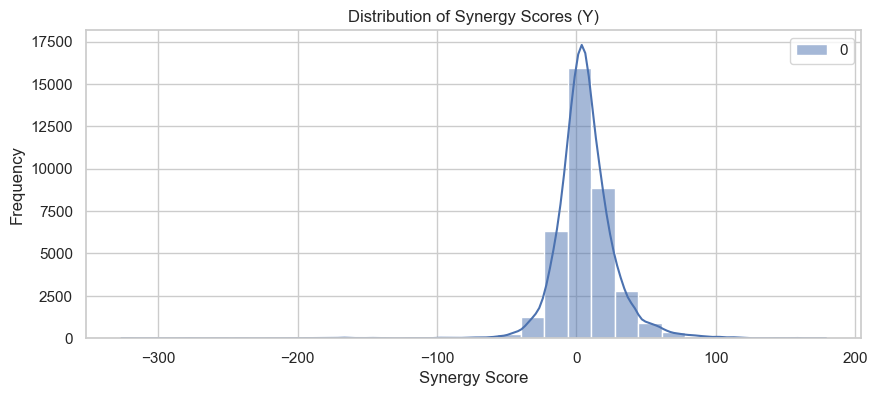

In [102]:
# Histogram of synergy scores (Y)
plt.figure(figsize=(10, 4))
sns.histplot(y, kde=True, bins=30, color="blue")
plt.title("Distribution of Synergy Scores (Y)")
plt.xlabel("Synergy Score")
plt.ylabel("Frequency")
plt.show()

In [14]:
unique_y, counts_y = np.unique(y, axis=0, return_counts=True)
duplicates = unique_y[counts_y > 1]
duplicate_counts = counts_y[counts_y > 1]

# Print detailed results
if len(duplicates) > 0:
    print(f"Number of duplicate synergy scores: {len(duplicates)}")
    print("Duplicate synergy scores and their counts:")
    for i, (dup, count) in list(enumerate(zip(duplicates, duplicate_counts)))[:5]:
        print(f"{i + 1}. Synergy Score: {dup}, Count: {count}")
else:
    print("No duplicate synergy scores found.")

Number of duplicate synergy scores: 18517
Duplicate synergy scores and their counts:
1. Synergy Score: [-326.4643042], Count: 2
2. Synergy Score: [-307.0262696], Count: 2
3. Synergy Score: [-281.4366679], Count: 2
4. Synergy Score: [-277.8941379], Count: 2
5. Synergy Score: [-261.7396847], Count: 2


Every score is present 2 times, i.e. strong indication that this already involves permutations of drugs A and B. Using this information we can double-ckeck if our assumption about the data processing is ok.

In [16]:
# get indices of a random duplicated synergy score
indices = np.where(y == duplicates[0])[0]
indices

array([ 8450, 27002], dtype=int64)

In [19]:
x_dup_a, x_dup_b = x[indices[0]], x[indices[1]]
num_cols = 4
num_features = x_dup_a.shape[0] // num_cols
x_dup_a_reshaped = x_dup_a.reshape(num_cols, num_features)
x_dup_b_reshaped = x_dup_b.reshape(num_cols, num_features)

In [20]:
x_dup_a_reshaped

array([[ 4.24248739e-04,  8.37553794e-02, -6.78476579e-02, ...,
        -1.39625932e-02, -1.03552669e-01,  3.11506738e+00],
       [-7.30738974e-02, -9.34097213e-02, -1.00872516e-01, ...,
        -9.30138070e-02, -1.06067235e-01,  1.79208092e+00],
       [-7.98334966e-03, -3.65284037e-01,  3.96395710e-01, ...,
        -1.00803422e+00,  1.93084692e-01,  0.00000000e+00],
       [-3.04142360e-01, -3.25653404e-01, -6.50841994e-01, ...,
        -7.49640426e-01, -3.35506618e-01,  0.00000000e+00]])

In [21]:
x_dup_b_reshaped

array([[-7.30738974e-02, -9.34097213e-02, -1.00872516e-01, ...,
        -9.30138070e-02, -1.06067235e-01,  1.79208092e+00],
       [ 4.24248739e-04,  8.37553794e-02, -6.78476579e-02, ...,
        -1.39625932e-02, -1.03552669e-01,  3.11506738e+00],
       [-7.98334966e-03, -3.65284037e-01,  3.96395710e-01, ...,
        -1.00803422e+00,  1.93084692e-01,  0.00000000e+00],
       [-3.04142360e-01, -3.25653404e-01, -6.50841994e-01, ...,
        -7.49640426e-01, -3.35506618e-01,  0.00000000e+00]])

In [ ]:
# we can clearly see that (0, :), and (1, :) of sample a and sample b are same

# Synergy Score Analysis
This notebook investigates the input data from `x.npy` and `y.pkl` and generates visualizations.

**Code generated with the help with GitHUb copilot in the loop**

"The cell line feature includes the gene expression or gene dependency of 2401 genes (when 0-indexed?). It is worth mentioning that the number of columns changes to 4 when both gene expression and dependency are used for the representation of cells. " -> Our input that is processed is of length 2402 * 4.

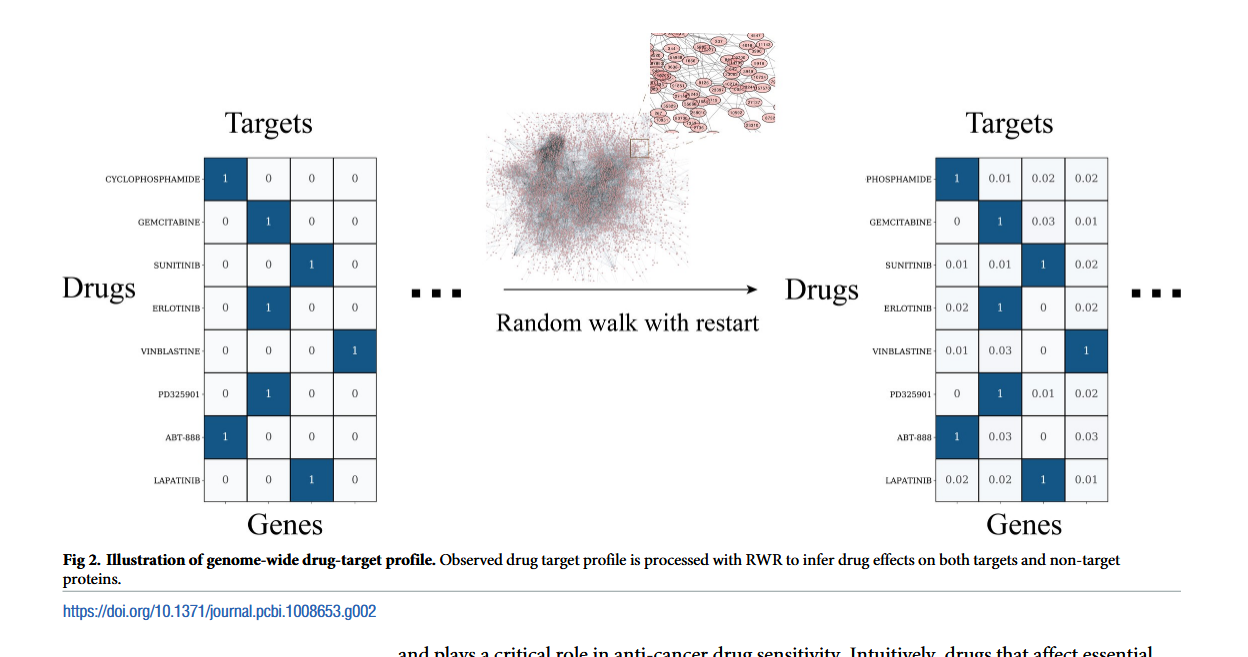

In [7]:
# split elements of X into segments of 4*2402 regarding drug, representing the case in the paper where 4 columns are used.

# Reshape X to have 4 columns (assuming each drug has 4 features)
feature_length = 2402  # Length of each feature vector
num_samples = x.shape[0]
num_cols = 4
x_reshaped = x.reshape(num_samples, 4, feature_length)
x_reshaped.shape  # Check the new shape

(37104, 4, 2402)

In [41]:
drugs_a = x_reshaped[:, 0, :]
drugs_b = x_reshaped[:, 1, :]
cell_line_expressions = x_reshaped[:, 2, :]
cell_line_dependencies = x_reshaped[:, 3, :]

In [ ]:
# de-deublicate the cell line expressions and dependencies 
unique_cell_line_expressions, _ = np.unique(cell_line_expressions, axis=0, return_counts=True)
unique_cell_line_dependencies, _ = np.unique(cell_line_dependencies, axis=0, return_counts=True)

"We finally selected 36 drugs that targeted at least one
protein and 35 cell lines. The final dataset has 18553 data points and 523 pairs of drug
combinations." -- all mathes

In [34]:
unique_cell_line_expressions.shape

(35, 2402)

In [35]:
unique_cell_line_dependencies.shape

(35, 2402)

In [60]:
unique_cell_line_expressions, first_indices = np.unique(cell_line_expressions, axis=0, return_index=True)


In [61]:
first_indices

array([15937, 10146,  3756,  9623,  2149,  1065,  1607, 11192, 13826,
       14872,  9100,  8016,  2691, 14349, 17506, 12257, 15414,  5363,
           0, 16983, 10669,  3214, 16460,   542, 13303,  4821,  6951,
        8558,  7474,  4298, 18029,  6428, 12780,  5886, 11715],
      dtype=int64)

# PCA of cell lines

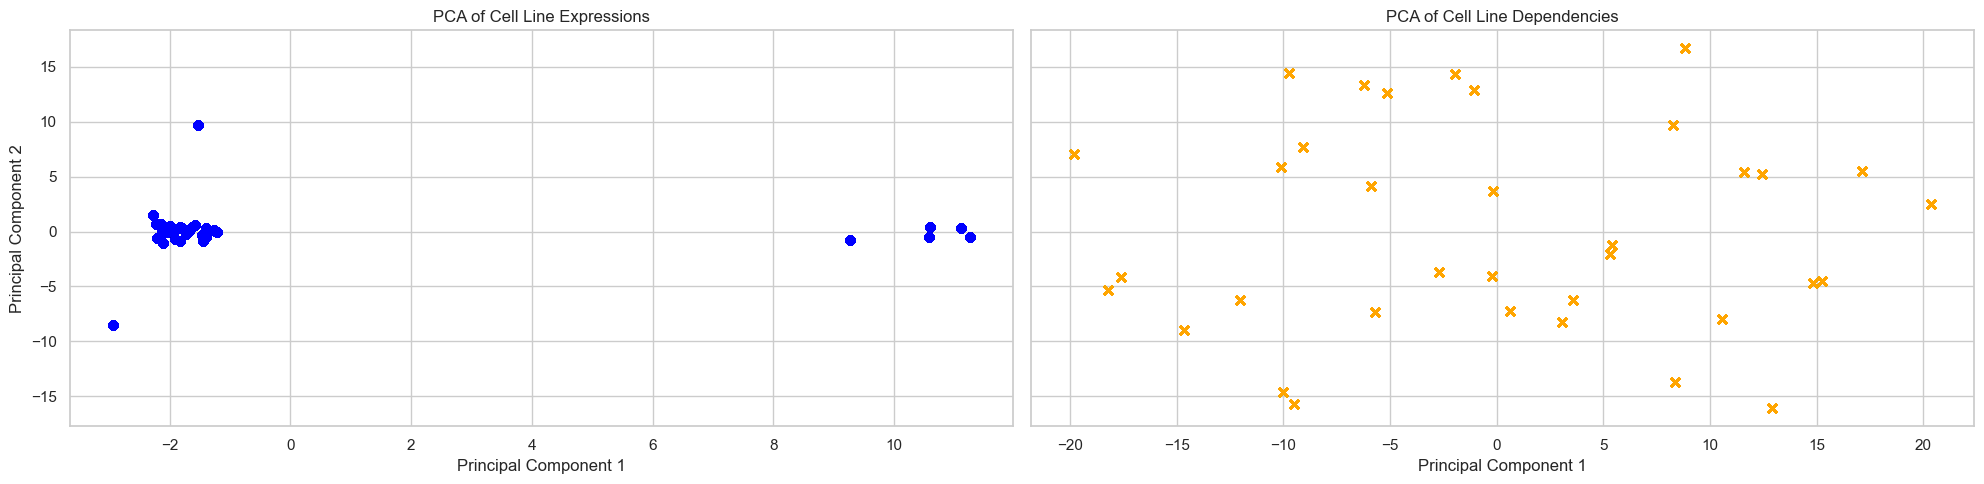

In [104]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA to reduce dimensions to 2D
pca_expressions = PCA(n_components=2)
cell_line_expressions_pca = pca_expressions.fit_transform(cell_line_expressions)

pca_dependencies = PCA(n_components=2)
cell_line_dependencies_pca = pca_dependencies.fit_transform(cell_line_dependencies)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)

# Plot PCA for cell_line_expressions
axes[0].scatter(cell_line_expressions_pca[:, 0], cell_line_expressions_pca[:, 1], alpha=0.7, c='blue', marker='o')
axes[0].set_title("PCA of Cell Line Expressions")
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")
axes[0].grid(True)

# Plot PCA for cell_line_dependencies
axes[1].scatter(cell_line_dependencies_pca[:, 0], cell_line_dependencies_pca[:, 1], alpha=0.7, c='orange', marker='x')
axes[1].set_title("PCA of Cell Line Dependencies")
axes[1].set_xlabel("Principal Component 1")
axes[1].grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


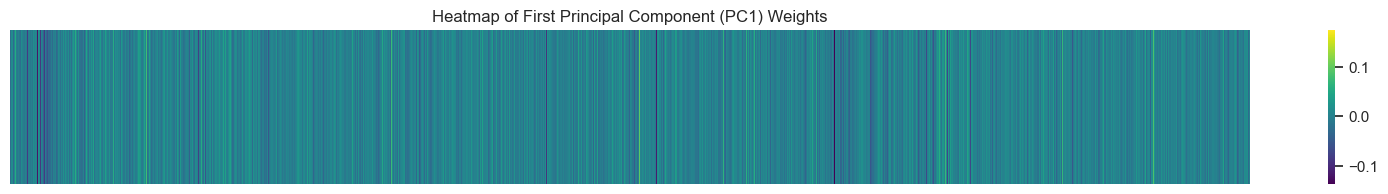

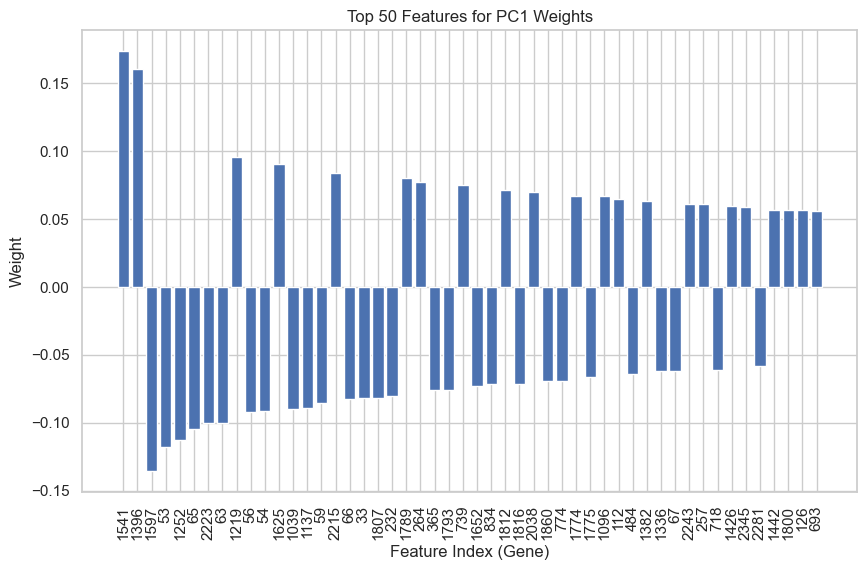

In [105]:
import seaborn as sns

# Assuming pca_expressions is the PCA model for expressions
pc1_weights = pca_expressions.components_[0]

# Convert weights into a 2D array for better visualization
pc1_weights = np.reshape(pc1_weights, (1, -1))  # Reshape to 1 row, 2402 columns

# Create a heatmap
plt.figure(figsize=(20, 2))  # Adjust size to make it look good
sns.heatmap(pc1_weights, cmap='viridis', cbar=True, xticklabels=False, yticklabels=False)
plt.title("Heatmap of First Principal Component (PC1) Weights")
plt.show()# Assuming pc1_weights is a 1D array of shape (2402,)
pc1_weights = pca_expressions.components_[0]

# Sort the absolute values of the weights and pick the top N
top_n = 50
sorted_indices = np.argsort(np.abs(pc1_weights))[::-1]  # Sort by absolute value, descending
top_n_indices = sorted_indices[:top_n]  # Indices of the top N features

# Plot the top N weights using the correct indices
top_n_weights = pc1_weights[top_n_indices]

# Now plot the top N weights
plt.figure(figsize=(10, 6))
plt.bar(range(top_n), top_n_weights)
plt.title(f"Top {top_n} Features for PC1 Weights")
plt.xlabel("Feature Index (Gene)")
plt.ylabel("Weight")
plt.xticks(range(top_n), top_n_indices, rotation=90)  # Show the indices on the x-axis
plt.grid(True)
plt.show()


## Interestingly deduplication of drugs does not work the same ... But their PCA is the same 

In [55]:
full_unique_drugs, _ = np.unique(drugs_a[:,:], axis=0, return_counts=True)

In [ ]:
full_unique_drugs.shape # what is this last axis??????

(14696, 2402)

In [50]:
# de-deublicate the drugs a and b
unique_drugs, _ = np.unique(drugs_a[:,:-1], axis=0, return_counts=True)

In [52]:
unique_drugs.shape

(35, 2401)

In [53]:
unique_drugs.shape

(35, 2401)

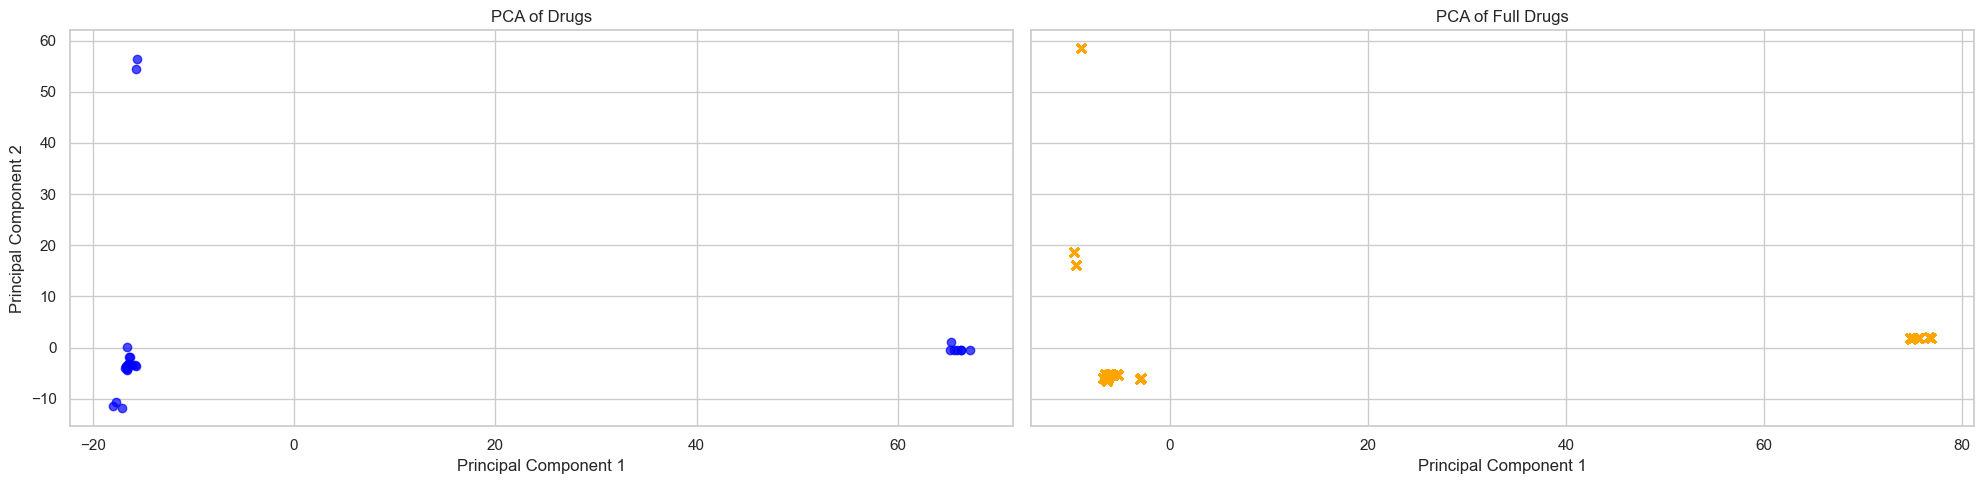

In [106]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA to reduce dimensions to 2D
pca_drugs = PCA(n_components=2)
drugs_pca = pca_drugs.fit_transform(unique_drugs)

pca_full_drugs= PCA(n_components=2)
full_drugs_pca = pca_full_drugs.fit_transform(full_unique_drugs)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 5), sharey=True)

# Plot PCA for cell_line_expressions
axes[0].scatter(drugs_pca[:, 0], drugs_pca[:, 1], alpha=0.7, c='blue', marker='o')
axes[0].set_title("PCA of Drugs")
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")
axes[0].grid(True)

# Plot PCA for cell_line_dependencies
axes[1].scatter(full_drugs_pca[:, 0], full_drugs_pca[:, 1], alpha=0.7, c='orange', marker='x')
axes[1].set_title("PCA of Full Drugs")
axes[1].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")
axes[1].grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


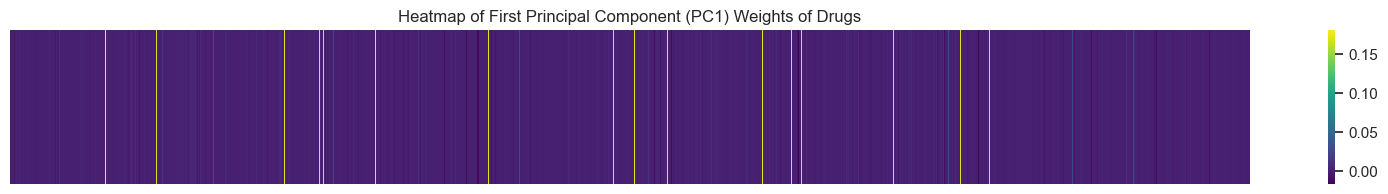

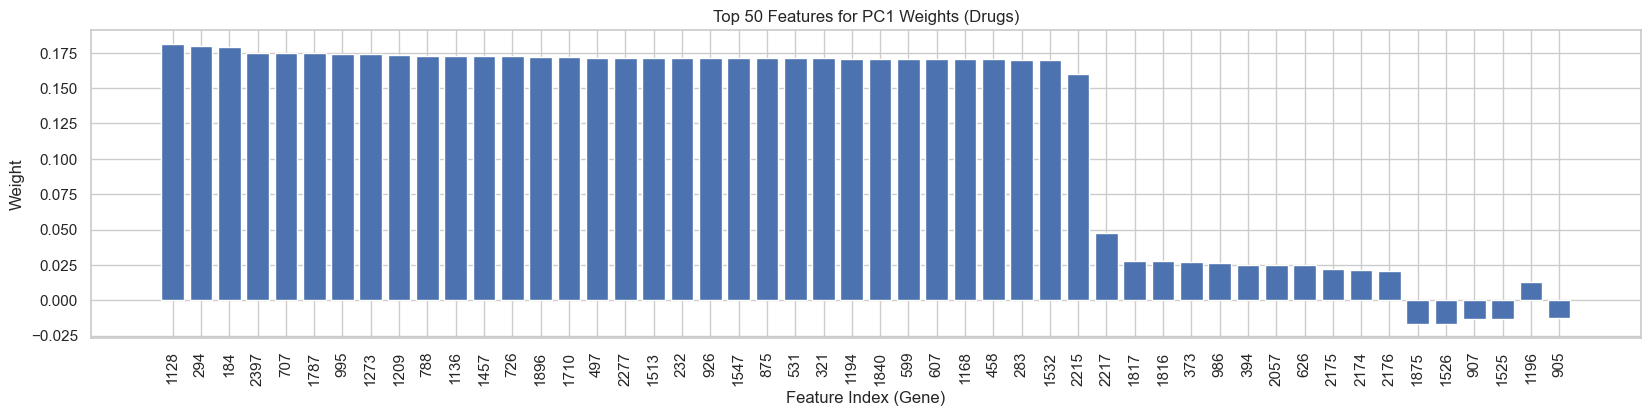

In [108]:
import seaborn as sns

# Assuming pca_expressions is the PCA model for expressions
pc1_weights = pca_drugs.components_[0]

# Convert weights into a 2D array for better visualization
pc1_weights = np.reshape(pc1_weights, (1, -1))  # Reshape to 1 row, 2402 columns

# Create a heatmap
plt.figure(figsize=(20, 2))  # Adjust size to make it look good
sns.heatmap(pc1_weights, cmap='viridis', cbar=True, xticklabels=False, yticklabels=False)
plt.title("Heatmap of First Principal Component (PC1) Weights of Drugs")
plt.show()# Assuming pc1_weights is a 1D array of shape (2402,)
pc1_weights = pca_drugs.components_[0]

# Sort the absolute values of the weights and pick the top N
top_n = 50
sorted_indices = np.argsort(np.abs(pc1_weights))[::-1]  # Sort by absolute value, descending
top_n_indices = sorted_indices[:top_n]  # Indices of the top N features

# Plot the top N weights using the correct indices
top_n_weights = pc1_weights[top_n_indices]

# Now plot the top N weights
plt.figure(figsize=(20, 4))
plt.bar(range(top_n), top_n_weights)
plt.title(f"Top {top_n} Features for PC1 Weights (Drugs)")
plt.xlabel("Feature Index (Gene)")
plt.ylabel("Weight")
plt.xticks(range(top_n), top_n_indices, rotation=90)  # Show the indices on the x-axis
plt.grid(True)
plt.show()


In [ ]:
# Look for duplicate samples in axis -1 in the reshaped data for example (37104, 2, :) and (37103, 2, :) could be fuplicates but the 2nd axis is always fixed!
_, counts = np.unique(x_reshaped, axis=0, return_counts=True)
counts

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

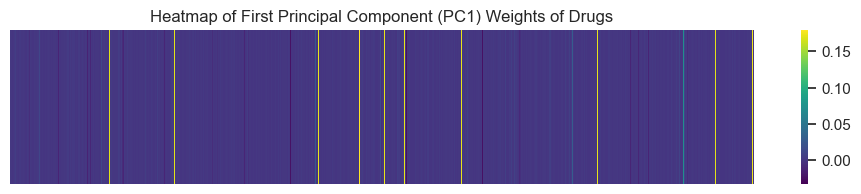

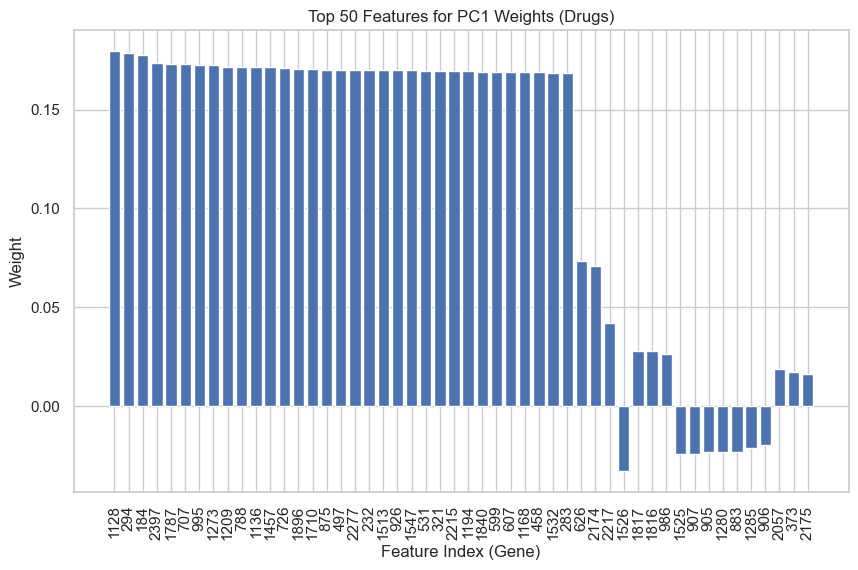

In [99]:
import seaborn as sns

# Assuming pca_expressions is the PCA model for expressions
pc1_weights = pca_full_drugs.components_[0]

# Convert weights into a 2D array for better visualization
pc1_weights = np.reshape(pc1_weights, (1, -1))  # Reshape to 1 row, 2402 columns

# Create a heatmap
plt.figure(figsize=(12, 2))  # Adjust size to make it look good
sns.heatmap(pc1_weights, cmap='viridis', cbar=True, xticklabels=False, yticklabels=False)
plt.title("Heatmap of First Principal Component (PC1) Weights of Drugs")
plt.show()# Assuming pc1_weights is a 1D array of shape (2402,)
pc1_weights = pca_full_drugs.components_[0]

# Sort the absolute values of the weights and pick the top N
top_n = 50
sorted_indices = np.argsort(np.abs(pc1_weights))[::-1]  # Sort by absolute value, descending
top_n_indices = sorted_indices[:top_n]  # Indices of the top N features

# Plot the top N weights using the correct indices
top_n_weights = pc1_weights[top_n_indices]

# Now plot the top N weights
plt.figure(figsize=(10, 6))
plt.bar(range(top_n), top_n_weights)
plt.title(f"Top {top_n} Features for PC1 Weights (Drugs)")
plt.xlabel("Feature Index (Gene)")
plt.ylabel("Weight")
plt.xticks(range(top_n), top_n_indices, rotation=90)  # Show the indices on the x-axis
plt.grid(True)
plt.show()


quick and dirty notebook for sure, but gets us a first feeling about the data w/o the need of re-generation of the data